# 说明
### 答案均保留六位小数
### 牛顿法初始值为1，割线法初始值为0和2.

In [2]:
import numpy as np

def f(x):
    return np.exp(x) + 0.9 * x - 2

def f_prime(x):
    return np.exp(x) + 0.9


def erfen(f, a, b, tol=1e-6):
    iterations = 0
    while (b - a) / 2 > tol:
        iterations += 1
        c = (a + b) / 2
        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, iterations


def niudun(f, f_prime, x0, tol=1e-6, max_iter=100):
    iterations = 0
    x = x0
    for _ in range(max_iter):
        iterations += 1
        x_new = x - f(x) / f_prime(x)
        if abs(x_new - x) < tol:
            return x_new, iterations
        x = x_new
    


def gexian(f, x0, x1, tol=1e-6, max_iter=100):
    iterations = 0
    for _ in range(max_iter):
        iterations += 1
        if abs(x1 - x0) < tol:
            return x1, iterations
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x0, x1 = x1, x2
    


a, b = 0, 2
x0 = 1  
x1 = 0  
x2 = 2  


root1, iter1 = erfen(f, a, b)
root2, iter2 = niudun(f, f_prime, x0)
root3, iter3 = gexian(f, x1, x2)


print(f"二分法: 根 = {root1:.6f}, 迭代步数 = {iter1}")
print(f"牛顿法: 根 = {root2:.6f}, 迭代步数 = {iter2}")
print(f"割线法: 根 = {root3:.6f}, 迭代步数 = {iter3}")

二分法: 根 = 0.460775, 迭代步数 = 20
牛顿法: 根 = 0.460775, 迭代步数 = 5
割线法: 根 = 0.460775, 迭代步数 = 7


# 可以看到，在快速求解时，牛顿法的收敛速度是最快的，割线法次之，但这两种方法存在因初始值选取不当而不能收敛的问题。

三分搜索法结果:
极小值点 x = 0.000273
极小值 f(x) = 1.000000
迭代次数: 42
理论极小值点: x = 0


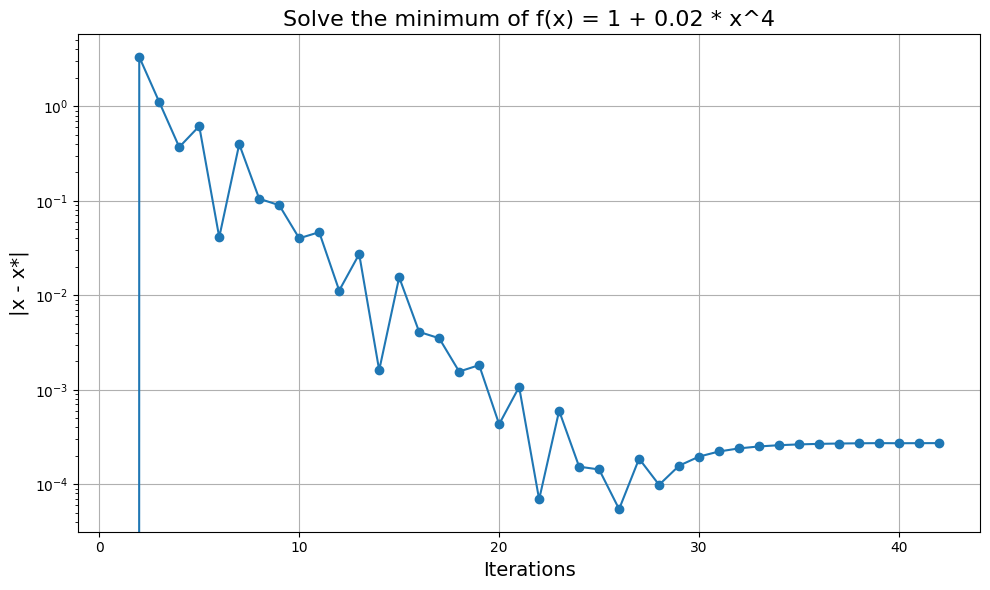

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1 + 0.02 * x**4
def sanfen(f, left, right, tol=1e-6, max_iter=100):
   
    iterations = 0
    x_history = []
    
    while right - left > tol and iterations < max_iter:
        iterations += 1
        
        left_third = left + (right - left) / 3
        right_third = right - (right - left) / 3
        
        
        x_history.append((left_third + right_third) / 2)
        
    
        if f(left_third) < f(right_third):
            right = right_third
        else:
            left = left_third
    
    min_x = (left + right) / 2
    min_y = f(min_x)
    
    return min_x, min_y, iterations, x_history


a, b = -10, 10
min_x, min_y, iterations, x_history = sanfen(f, a, b)
theoretical_min_x = 0
theoretical_min_y = f(theoretical_min_x)


error = abs(min_x - theoretical_min_x)

print(f"三分搜索法结果:")
print(f"极小值点 x = {min_x:.6f}")
print(f"极小值 f(x) = {min_y:.6f}")
print(f"迭代次数: {iterations}")
print(f"理论极小值点: x = {theoretical_min_x}")



x = np.linspace(-3, 3, 1000)
y = [f(xi) for xi in x]
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.figure(figsize=(10, 6))
plt.semilogy([i+1 for i in range(len(x_history))], [abs(x - theoretical_min_x) for x in x_history], 'o-')
plt.grid(True)
plt.title('Solve the minimum of f(x) = 1 + 0.02 * x^4', fontsize=16)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('|x - x*|', fontsize=14)
plt.tight_layout()
plt.show()

# 如上图所示，当最小区间长为e-6时，误差收敛于0.0001数量级